<a href="https://colab.research.google.com/github/UtkarshAIITB/IPL-Data-Analysis/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/new.csv')
# new.head()

In [104]:
t = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/t.csv')
# t.head()

In [105]:
t.drop(columns = ['Unnamed: 0'], inplace = True)
t.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,597998,2013-04-03,9,6,9,9,1,0.1,6,9,2013,1,0,0,128,0,1
1,597998,2013-04-03,9,6,9,9,1,0.2,6,9,2013,1,0,0,128,4,1
2,597998,2013-04-03,9,6,9,9,1,0.3,6,9,2013,1,0,0,128,5,1
3,597998,2013-04-03,9,6,9,9,1,0.4,6,9,2013,1,0,0,128,5,1
4,597998,2013-04-03,9,6,9,9,1,0.5,6,9,2013,1,0,0,128,5,1


In [106]:
new.drop(columns = ['Unnamed: 0'], inplace = True)

In [107]:
new.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,335982,2008-04-18,5,9,5,9,1,0.1,9,5,2008,1,0,0,222,1,0
1,335982,2008-04-18,5,9,5,9,1,0.2,9,5,2008,1,0,0,222,1,0
2,335982,2008-04-18,5,9,5,9,1,0.3,9,5,2008,1,0,0,222,2,0
3,335982,2008-04-18,5,9,5,9,1,0.4,9,5,2008,1,0,0,222,2,0
4,335982,2008-04-18,5,9,5,9,1,0.5,9,5,2008,1,0,0,222,2,0


In [108]:
# new is the training set and t is the test set

In [109]:
tnew = t.drop(t[(t.over < 15.5) | (t.over >=15.6)].index)
tnew.reset_index(drop = True)
y1test = tnew['total_runs_y']
y2test = tnew['winner']
id_test = tnew['id'].reset_index(drop = True)
id_test = id_test.to_frame().reset_index(drop=True)
tnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
tnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,9,6,9,1,15.5,6,9,1,0,0,98,6
1,9,6,9,2,15.5,9,6,1,0,0,104,4
2,5,12,12,1,15.5,5,12,1,0,0,106,5
3,5,12,12,2,15.5,12,5,1,0,0,105,3
4,7,2,2,1,15.5,7,2,1,0,0,91,4


In [110]:
xnew = new.drop(new[(new.over < 15.5) | (new.over >=15.6)].index)
xnew.reset_index(drop = True)
y1train = xnew['total_runs_y']
y2train = xnew['winner']
xnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
xnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,5,9,5,1,15.5,9,5,1,0,0,158,2
1,8,11,11,1,15.5,11,8,0,0,0,168,5
2,8,11,11,2,15.5,8,11,0,0,0,174,3
3,6,10,10,1,15.5,10,6,0,0,0,104,7
4,12,5,12,1,15.5,12,5,0,0,0,110,4


In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [112]:
xnewt = sc.fit_transform(xnew) 
tnewt = sc.fit_transform(tnew)

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [114]:
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(12, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [115]:
history= model.fit(x=xnewt, y=y1train, epochs=150, 
          validation_data=(tnewt,y1test))

Epoch 1/150
43/43 [==============================] - 1s 6ms/step - loss: 26006.4316 - val_loss: 22910.2676
Epoch 2/150
43/43 [==============================] - 0s 3ms/step - loss: 25030.8926 - val_loss: 21222.5312
Epoch 3/150
43/43 [==============================] - 0s 3ms/step - loss: 21340.5273 - val_loss: 15275.8330
Epoch 4/150
43/43 [==============================] - 0s 3ms/step - loss: 12244.8193 - val_loss: 5013.6870
Epoch 5/150
43/43 [==============================] - 0s 3ms/step - loss: 4024.4741 - val_loss: 1402.5227
Epoch 6/150
43/43 [==============================] - 0s 2ms/step - loss: 2371.0750 - val_loss: 1093.7030
Epoch 7/150
43/43 [==============================] - 0s 4ms/step - loss: 2096.4658 - val_loss: 929.9693
Epoch 8/150
43/43 [==============================] - 0s 3ms/step - loss: 1785.0070 - val_loss: 864.0615
Epoch 9/150
43/43 [==============================] - 0s 2ms/step - loss: 1845.4337 - val_loss: 757.0772
Epoch 10/150
43/43 [==============================]

In [116]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


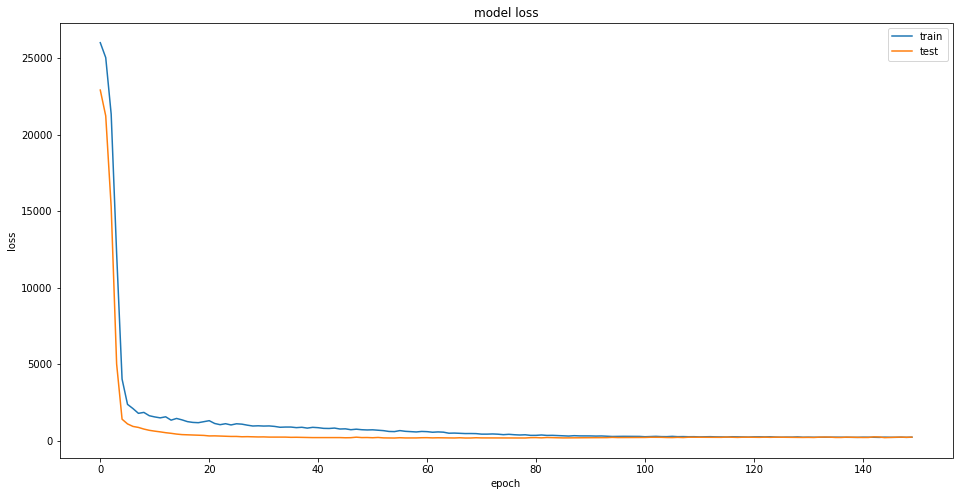

In [117]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [118]:
y1test = y1test.ravel()

In [119]:
predictions = model.predict(tnewt)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y1test
sample.head(10)

,Predict,Actual
0,140.471313,128
1,145.624268,129
2,157.062866,156
3,153.153793,154
4,136.939941,126
5,118.069656,104
6,190.603088,165
7,170.180176,160
8,149.215103,148
9,134.535828,139


In [120]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [121]:
custom_accuracy(sample['Actual'] , sample['Predict'],10)

49.65986394557823

In [122]:
# sample.to_csv('sample.csv')

In [123]:
# try1 = sample[sample.Actual == 128]
# try1.head()

In [124]:
# try1.shape[0]

In [125]:
# try1.sum()

In [126]:
# (try1.sum())/try1.shape[0]

In [127]:
# try2 = sample[sample.Actual == 129]
# (try2.sum())/try2.shape[0]

In [128]:
# try2 = sample[sample.Actual == 156]
# result = (try2.sum())/try2.shape[0]

In [129]:
# result

In [130]:
# res2 = result.values.reshape(1,2)

In [131]:
# res2

In [132]:
# res2.shape

In [133]:
# df.loc[len(df)] = your_array
# results.loc[len(results)] = res2
# df.append(pd.DataFrame(arr).T)
# results = results.append(pd.DataFrame(res2))
# results.append(pd.DataFrame(res3))

In [134]:
ar1 = sample['Actual'].unique()

In [135]:
results = pd.DataFrame()

In [136]:
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [137]:
results.head()

,0,1
0,140.471313,128.0
0,142.807175,129.0
0,157.062866,156.0
0,159.339071,154.0
0,138.426208,126.0


In [138]:
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)

In [139]:
results.reset_index(drop = True)

,Predict,Actual
0,140.471313,128.0
1,142.807175,129.0
2,157.062866,156.0
3,159.339071,154.0
4,138.426208,126.0
...,...,...
76,188.838882,190.0
77,116.639923,113.0
78,168.350708,172.0
79,154.390015,134.0


In [140]:
results.tail()

,Predict,Actual
0,188.838882,190.0
0,116.639923,113.0
0,168.350708,172.0
0,154.390015,134.0
0,186.493988,192.0


In [141]:
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

59.25925925925925


In [142]:
# results.info()

In [143]:
# results['Actual']

In [144]:
tests = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/testset.csv')
# tests.head()
tests.drop(columns = ['Unnamed: 0'], inplace = True)
tests.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,1254058,2021-04-09,12,5,5,5,1,0.1,12,5,1,0,0,159,2,0
1,1254058,2021-04-09,12,5,5,5,1,0.2,12,5,1,0,0,159,2,0
2,1254058,2021-04-09,12,5,5,5,1,0.3,12,5,1,0,0,159,2,0
3,1254058,2021-04-09,12,5,5,5,1,0.4,12,5,1,0,0,159,4,0
4,1254058,2021-04-09,12,5,5,5,1,0.5,12,5,1,0,0,159,4,0


In [145]:
sets = tests.drop(tests[(tests.over < 15.5) | (tests.over >=15.6)].index)
sets.reset_index(drop = True)
yt1 = sets['total_runs_y']
yt2 = sets['winner']
tt_2021 = tests['id'].reset_index(drop = True)
tt_2021 = tt_2021.to_frame().reset_index(drop = True)
sets.drop(columns = ['id', 'date', 'total_runs_y', 'winner'], inplace = True)
sets.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,12,5,5,1,15.5,12,5,1,0,0,135,3
1,12,5,5,2,15.5,5,12,1,0,0,120,5
2,11,6,6,1,15.5,11,6,1,0,0,142,6
3,11,6,6,2,15.5,6,11,1,0,0,157,1
4,9,7,7,1,15.5,9,7,1,0,0,151,2


In [146]:
yt1 = yt1.ravel()

In [147]:
xs = sc.fit_transform(sets)

In [148]:
predictions = model.predict(xs)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=yt1
sample.head(10)

,Predict,Actual
0,173.883240,159
1,151.283234,160
2,175.412003,188
3,179.533661,190
4,185.967941,187
5,157.481964,177
6,200.145950,221
7,191.376801,217
8,161.549133,152
9,154.310516,142


In [149]:
ar1 = sample['Actual'].unique()
results = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [150]:
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
results.reset_index(drop = True)
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

55.88235294117647


In [151]:
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(13, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])

In [196]:
win_pred = model.fit(x=xnewt, y=y2train, epochs=400, 
          validation_data=(tnewt,y2test))

Epoch 1/400
43/43 [==============================] - 0s 3ms/step - loss: 1.4540 - accuracy: 0.4147 - val_loss: 1.3465 - val_accuracy: 0.5238
Epoch 2/400
43/43 [==============================] - 0s 3ms/step - loss: 1.4378 - accuracy: 0.4235 - val_loss: 1.3863 - val_accuracy: 0.4490
Epoch 3/400
43/43 [==============================] - 0s 3ms/step - loss: 1.4401 - accuracy: 0.4235 - val_loss: 1.3638 - val_accuracy: 0.4898
Epoch 4/400
43/43 [==============================] - 0s 3ms/step - loss: 1.4093 - accuracy: 0.4242 - val_loss: 1.3836 - val_accuracy: 0.5034
Epoch 5/400
43/43 [==============================] - 0s 2ms/step - loss: 1.4540 - accuracy: 0.3812 - val_loss: 1.3724 - val_accuracy: 0.4966
Epoch 6/400
43/43 [==============================] - 0s 3ms/step - loss: 1.4488 - accuracy: 0.4315 - val_loss: 1.3684 - val_accuracy: 0.4490
Epoch 7/400
43/43 [==============================] - 0s 2ms/step - loss: 1.4513 - accuracy: 0.4184 - val_loss: 1.3618 - val_accuracy: 0.5034
Epoch 8/400
4

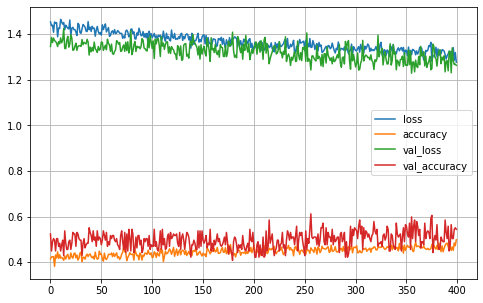

In [197]:
pd.DataFrame(win_pred.history).plot(figsize = (8,5))
plt.grid(True)
plt.show()

In [198]:
y2test = y2test.ravel()

In [199]:
predictions = model.predict(tnewt)
class_pred = np.argmax(predictions, axis=1)
class_pred
# sample = pd.DataFrame(predictions,columns=['Predict'])
# sample['Actual']=y2test
# sample.head(10)

array([ 9,  8, 12, 12,  2,  2, 10,  6, 11, 11,  8,  7,  6,  9,  9,  6, 12,
       11, 11,  9,  5, 10, 10,  6,  7, 11, 11, 11, 11,  9,  9, 10,  9, 10,
       11,  9,  9,  6,  6,  2,  5, 11, 11, 11, 11,  9,  9, 11,  9, 10, 10,
        6,  6,  8,  8, 11, 11,  5,  5,  7,  7, 12, 12, 11, 11,  9,  9, 10,
       10, 12, 12, 11,  9,  2,  5, 10, 10, 12, 12, 11, 11,  7,  7,  6,  6,
       11,  9,  5,  5,  9,  9,  6,  8,  8, 11, 10, 10,  6,  6, 10, 10, 11,
       12, 11, 11,  9,  9,  9,  9,  6,  6, 12, 12,  7,  8,  9,  9,  9,  9,
        8,  7,  7, 12,  9,  9, 11, 11, 12, 12,  6,  7, 10,  7,  8,  8,  5,
        5,  9,  9, 11, 11, 10,  7, 12, 11, 11, 11])

In [200]:
# predictions

In [201]:
# proba = predictions.round(2)
# proba

In [202]:
sample = pd.DataFrame(class_pred,columns=['Predict'])
sample['Actual']=y2test
# sample.head()

In [203]:
frames = [id_test, sample]
final = pd.concat(frames, axis = 1)
# final.head()
ar1 = final['id'].unique()
winner = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = final[final.id == items]
  # try2.drop(columns = 'id', inplace = True)
  hapi = try2.drop(columns = ['id']).reset_index(drop=True)
  result = (hapi.sum())/hapi.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  winner = winner.append(pd.DataFrame(res))
  
winner.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
winner.reset_index(drop = True)

winner['diff'] = abs(winner['Actual'] - winner['Predict'])
to = winner.shape[0]
print( ((winner[(winner['diff'])<1].shape[0])/to)*100 )

53.333333333333336


In [204]:
# final.to_csv('final.csv')

In [205]:
test_pred = model.predict(xs)
class_pred = np.argmax(test_pred, axis=1)
sample = pd.DataFrame(class_pred,columns=['Predict'])
yt2 = yt2.ravel()
sample['Actual']=yt2

In [206]:
frames = [tt_2021, sample]
final = pd.concat(frames, axis = 1)
# final.head()
ar1 = final['id'].unique()
winner = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = final[final.id == items]
  # try2.drop(columns = 'id', inplace = True)
  hapi = try2.drop(columns = ['id']).reset_index(drop=True)
  result = (hapi.sum())/hapi.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  winner = winner.append(pd.DataFrame(res))
  
winner.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
winner.reset_index(drop = True)

winner['diff'] = abs(winner['Actual'] - winner['Predict'])
to = winner.shape[0]
print( ((winner[(winner['diff'])<1].shape[0])/to)*100 )

100.0


In [207]:
winner.shape

(21, 3)